,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Jornal,0.056648,0.354104,1.000000,0.157960
Vendas,0.901208,0.349631,0.157960,1.000000


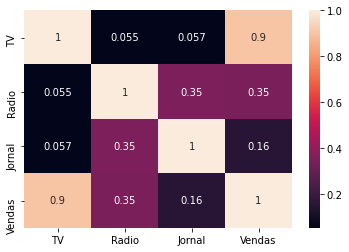

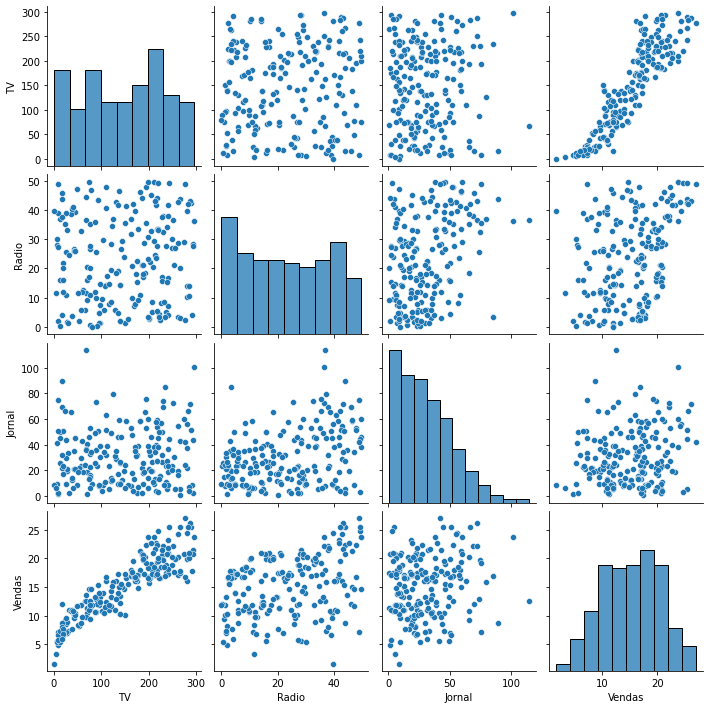

In [17]:
import pandas
import seaborn
import matplotlib.pyplot as plt

# Checking the data consistency
tabela = pandas.read_csv('advertising.csv')
display(tabela)

# Visualizing this data in a better way

display(tabela.corr()) # Visualizing the correlation of characteristics with the sale

seaborn.heatmap(tabela.corr(), annot=True) # Criando uma mapa de calor em cima das correlações
plt.show()

seaborn.pairplot(tabela)
plt.show()


In [18]:
# Artificial Intelligence - Separating training and testing data
from sklearn.model_selection import train_test_split

y = tabela['Vendas']
x = tabela.drop("Vendas", axis=1)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

In [19]:
# AI methods

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()


In [20]:
# Training the AI's

modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)



RandomForestRegressor()

In [21]:
# Lauching the AI's
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

#print(len(previsao_regressaolinear))
print(len(y_teste))

60


In [22]:
# Comparing which AI method had run with the best performance
from sklearn import metrics

display(metrics.r2_score(y_teste, previsao_regressaolinear))
display(metrics.r2_score(y_teste, previsao_arvoredecisao))

0.9071151423684273

0.963835670916065

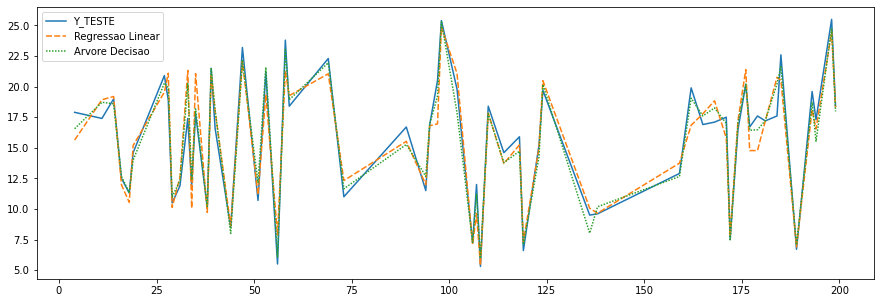

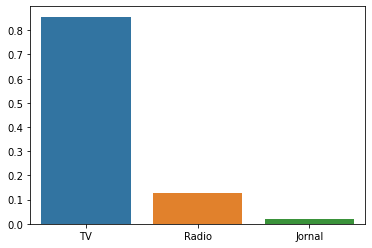

In [23]:
# Visualizing the results in a better way
# The closer the predictions are to y_test, the more accurate they will be.

result_table = pandas.DataFrame()
result_table['Y_TESTE'] = y_teste
result_table['Regressao Linear'] = previsao_regressaolinear 
result_table['Arvore Decisao'] = previsao_arvoredecisao
 
# Thoses graphs will make clear the difference between the methods of enabling AI
    
plt.figure(figsize=(15,5))
seaborn.lineplot(data=result_table) 
plt.show()


seaborn.barplot(x=x.columns, y=modelo_arvoredecisao.feature_importances_)
plt.show()